<a href="https://colab.research.google.com/github/laurlouie/Seattle-Weather/blob/main/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"a": np.ones((100,))})

## Introduction

###### We will be working with two csv files named seattle_rain.csv and ny_rain.csv. Both datasets were downloaded from the National Centers for Environmental Information, NOAA Climate Data Online search tool.

## Import libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

###### The code below reads both Seattle and New York data sets

In [143]:
#Load Seattle data set
df_seattle = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/seattle_rain.csv')

In [144]:
#Load New York data set
df_ny = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/ny_rain.csv')

## Explore the Contents of the Datasets

In [145]:
# Taking a look at the Seattle dataset first.
df_seattle.head()
# This shows the column titles in the Seattle dataset
print(df_seattle.columns)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')


Based on the output from above, there are some unnecessary columns that we can take out. It will not benefit our analysis.

In [146]:
# This shows the descriptive statistics of the Seattle dataset.
df_seattle.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


Now we can explore into the New York dataset

In [147]:
df_ny.head()
# This shows the column titles in the New York dataset
print(df_ny.columns)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')


In [148]:
# This shows the descriptive statistics of the New York dataset.
df_ny.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,17465.000000,17465.000000,17465.000000,155.000000,151.000000,17275.000000,11508.000000,6318.000000,0.0,0.0
mean,40.826103,-73.697762,48.792551,5.187097,0.835695,0.136644,0.043483,0.255033,NaN,NaN
std,0.189215,0.210564,46.087915,5.581494,1.253480,0.396871,0.520562,1.465410,NaN,NaN
min,40.615654,-74.145561,2.100000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,40.668899,-73.823290,4.300000,2.000000,0.070000,0.000000,0.000000,0.000000,NaN,NaN
50%,40.758947,-73.710999,42.700000,3.000000,0.390000,0.000000,0.000000,0.000000,NaN,NaN
75%,41.091681,-73.505371,91.700000,5.000000,1.010000,0.060000,0.000000,0.000000,NaN,NaN
max,41.150120,-73.358045,175.000000,42.000000,7.000000,9.450000,16.000000,18.000000,NaN,NaN


# Convert data types of columns of the data frames to the correct types

Now we want to check the data types to make sure each column is categorized correctly

In [149]:
#Checking data types
df_seattle.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [150]:
# Now we can change the data types to the correct "DATE" format
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])

df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])

This section focused on
1. correctly formatting the "DATE" variable


## Remove unnecessary parts of the data sets



In [151]:
# We want to make sure we drop the duplicate rows from both sets
df_seattle = df_seattle.drop_duplicates()

df_ny = df_ny.drop_duplicates()

In [153]:
# Ideally, we remove the unnecessary columns that we do not want to analyze.
# Since the column titles are the same in each dataset, we will be removing the same variables per dataset.

# Columns to remove
unnecessary = ['ELEVATION', 'DAPR', 'MDPR', 'SNOW', 'SNWD', 'DASF', 'MDSF']

# Remove specified columns from Seattle dataframe
df_seattle.drop(columns = unnecessary)

# Remove specified columns from New York dataframe
df_ny.drop(columns = unnecessary)


,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2020-01-01,0.00
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,2020-01-01,0.06
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,2020-01-01,0.00
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,2020-01-01,0.00
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,2020-01-01,0.00
...,...,...,...,...,...,...
17460,US1NYSF0158,"LINDENHURST 1.0 NE, NY US",40.695085,-73.358045,2023-12-31,0.00
17461,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,2023-12-31,0.00
17462,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2023-12-31,0.00
17463,US1NYSF0089,"AMITYVILLE 0.1 WSW, NY US",40.668899,-73.418342,2023-12-31,0.00


This section focused on:

1.   ensuring that there were no duplicates from both sets
2.   removing irrelevant columns that don't add to the analysis


## Creating a new dataframe (joining)

Keeping only the date and precipitation values, we want to join the two data sets.

In [154]:
average_seattle = df_seattle.groupby(by = 'DATE', as_index = False)['PRCP'].mean()
average_ny = df_ny.groupby(by = 'DATE', as_index = False)['PRCP'].mean()

In [155]:
average_seattle.head()

,DATE,PRCP
0,2020-01-01,0.162500
1,2020-01-02,0.181250
2,2020-01-03,0.267500
3,2020-01-04,0.172000
4,2020-01-05,0.168571


In [156]:
average_ny.head()

,DATE,PRCP
0,2020-01-01,0.013333
1,2020-01-02,0.000000
2,2020-01-03,0.134444
3,2020-01-04,0.200000
4,2020-01-05,0.040000


In [157]:
# True means that the length of the average
print(len(average_seattle) == len(average_ny))

True


In [158]:
print(average_seattle.shape)
print(average_ny.shape)

(1461, 2)
(1461, 2)


Joining the two datasets together.

In [159]:
# Conducting a left merge because the New York dataframe is larger than the Seattle one.
merged_df = average_ny.merge(average_seattle, on = 'DATE',
                             how = 'left')

merged_df = average_ny.merge(average_seattle, on = 'DATE',
                             how = 'left')

In [160]:
# Drops duplicates from the merged dataframe
merged_df = merged_df.drop_duplicates(subset = 'DATE')

In [161]:
# Taking a look at the first 5 rows in the merged_df
merged_df.head()

,DATE,PRCP_x,PRCP_y
0,2020-01-01,0.013333,0.162500
1,2020-01-02,0.000000,0.181250
2,2020-01-03,0.134444,0.267500
3,2020-01-04,0.200000,0.172000
4,2020-01-05,0.040000,0.168571


In [162]:
# Using the melt function to place all 'PRCP' values into their own column and creating the column called 'CITY'

df = pd.melt
 (merged_df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')
df

,DATE,CITY,PRCP
0,2020-01-01,PRCP_x,0.013333
1,2020-01-02,PRCP_x,0.000000
2,2020-01-03,PRCP_x,0.134444
3,2020-01-04,PRCP_x,0.200000
4,2020-01-05,PRCP_x,0.040000
...,...,...,...
2917,2023-12-27,PRCP_y,0.063333
2918,2023-12-28,PRCP_y,0.240000
2919,2023-12-29,PRCP_y,0.055000
2920,2023-12-30,PRCP_y,0.042500


In [168]:
# Renaming each city with their respective names
# This will be easier for the user to read and understand

df.loc[df['CITY'] == 'PRCP_x', 'CITY'] = 'New York City'

df.loc[df['CITY'] == 'PRCP_y', 'CITY'] = 'Seattle'

# Also renaming the 'PRCP' column to make it clearer for the user

rename1 = {'PRCP': 'PRECIPITATION'}
df = df.rename(columns = rename1)

In [169]:
# Checking to see what the dataframe looks like with the new renamed columns

df

,DATE,CITY,PRECIPITATION
0,2020-01-01,New York City,0.013333
1,2020-01-02,New York City,0.000000
2,2020-01-03,New York City,0.134444
3,2020-01-04,New York City,0.200000
4,2020-01-05,New York City,0.040000
...,...,...,...
2917,2023-12-27,Seattle,0.063333
2918,2023-12-28,Seattle,0.240000
2919,2023-12-29,Seattle,0.055000
2920,2023-12-30,Seattle,0.042500


<Axes: >

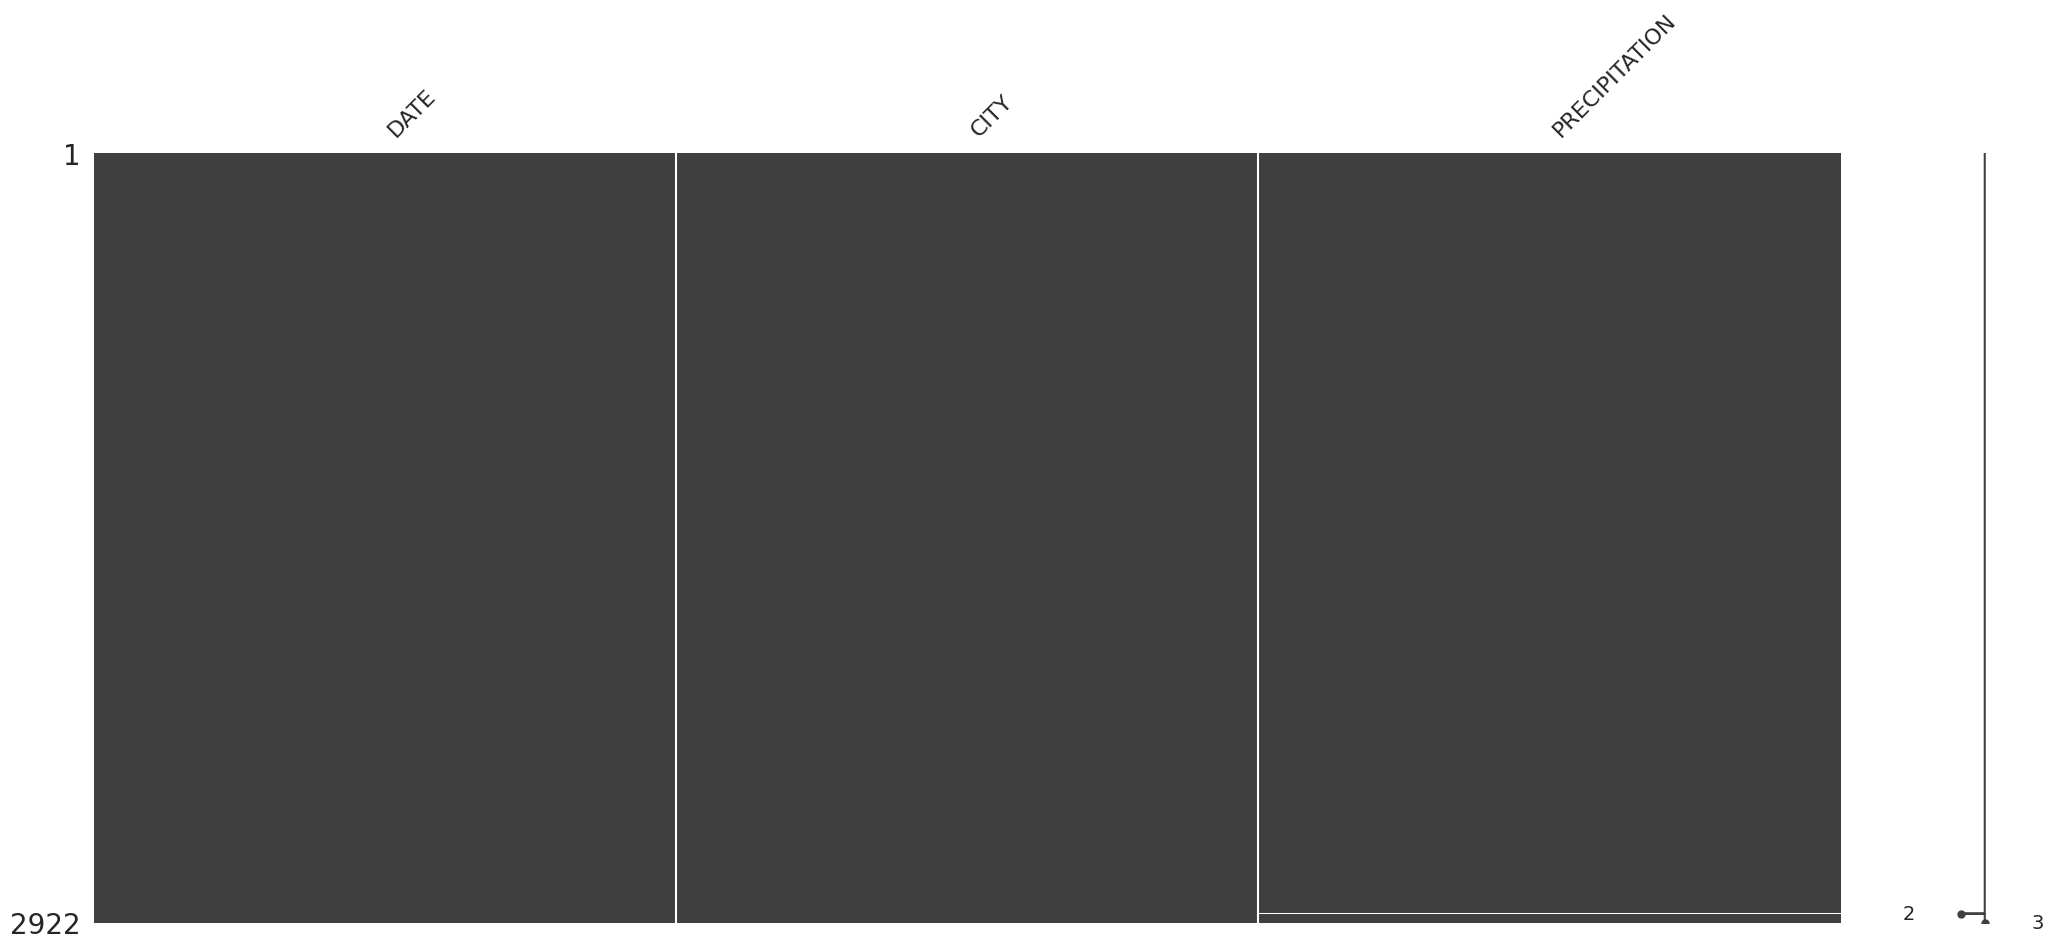

In [170]:
# Using the msno function, a matrix can look for gaps in the data.

msno.matrix(df)

In [174]:
df['PRECIPITATION'].isna().sum()

# There is 1 gap

1

In [175]:
# Getting rid of the gap, we use linear interpolation

df['PRCP'] = df['PRECIPITATION'].interpolate()
df['PRCP'].isna().sum()

# Now we are at 0

0

This section focused on:

1.   creating a new dataset by merging the two datasets together
2.   using the average precipitation values to "tidy" the data and place all into one variable with their respective city on the column to the left of it.
3.   updating the column titles
4.   removing gaps with linear interpolation.

## Export the clean .csv file

In [176]:
df.to_csv('new_clean_seattle_nyc_weather.csv', index=False)
